In [86]:
import spotipy
import pandas as pd
import json
from spotipy.oauth2 import SpotifyClientCredentials

In [87]:
import config

In [88]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))

In [89]:
results= sp.search(q="pop", limit =50, market ="DE")

In [90]:
results

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=pop&type=track&market=DE&offset=0&limit=50',
  'items': [{'album': {'album_type': 'single',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1Xyo4u8uXC1ZmMpatF05PJ'},
       'href': 'https://api.spotify.com/v1/artists/1Xyo4u8uXC1ZmMpatF05PJ',
       'id': '1Xyo4u8uXC1ZmMpatF05PJ',
       'name': 'The Weeknd',
       'type': 'artist',
       'uri': 'spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ'},
      {'external_urls': {'spotify': 'https://open.spotify.com/artist/6tbjWDEIzxoDsBA1FuhfPW'},
       'href': 'https://api.spotify.com/v1/artists/6tbjWDEIzxoDsBA1FuhfPW',
       'id': '6tbjWDEIzxoDsBA1FuhfPW',
       'name': 'Madonna',
       'type': 'artist',
       'uri': 'spotify:artist:6tbjWDEIzxoDsBA1FuhfPW'}],
     'external_urls': {'spotify': 'https://open.spotify.com/album/5O0zUvdnJr0RbWzLFneN2i'},
     'href': 'https://api.spotify.com/v1/albums/5O0zUvdnJr0RbWzLFneN2i',
     'id': '5O0zUvdnJr0RbWzLFneN2

In [91]:
import pprint

In [92]:
pprint.pprint(results)

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=pop&type=track&market=DE&offset=0&limit=50',
            'items': [{'album': {'album_type': 'single',
                                 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1Xyo4u8uXC1ZmMpatF05PJ'},
                                              'href': 'https://api.spotify.com/v1/artists/1Xyo4u8uXC1ZmMpatF05PJ',
                                              'id': '1Xyo4u8uXC1ZmMpatF05PJ',
                                              'name': 'The Weeknd',
                                              'type': 'artist',
                                              'uri': 'spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ'},
                                             {'external_urls': {'spotify': 'https://open.spotify.com/artist/6tbjWDEIzxoDsBA1FuhfPW'},
                                              'href': 'https://api.spotify.com/v1/artists/6tbjWDEIzxoDsBA1FuhfPW',
                                  

In [93]:
list(results.keys())

['tracks']

In [94]:
for item in results ["tracks"]["items"]:
    print("The name of song is: '{}' and the id is: {}".format(item['name'],item["id"]))

The name of song is: 'Popular (with Playboi Carti & Madonna) - From The Idol Vol. 1 (Music from the HBO Original Series)' and the id is: 6WzRpISELf3YglGAh7TXcG
The name of song is: 'Dior' and the id is: 79s5XnCN4TJKTVMSmOx8Ep
The name of song is: 'Popular Monster' and the id is: 4GssB27iJeqmfGxS94Tfij
The name of song is: 'Popcorn' and the id is: 45aoC0yE3RZGWz5QPb41M1
The name of song is: 'Poppin' Them Thangs' and the id is: 4E5IFAXCob6QqZaJMTw5YN
The name of song is: 'Pop like this Pt. 2 - Slowed' and the id is: 3xvzR05d6KgexfzjJgDRDl
The name of song is: 'Pop Out (feat. Lil Tjay)' and the id is: 6uFn47ACjqYkc0jADwEdj1
The name of song is: 'Popular Monster' and the id is: 4myFsmx2v6znDOJfn3IkbD
The name of song is: 'Invincible' and the id is: 792HwhrdO3ErRKL5yRe4Ge
The name of song is: 'POP/STARS' and the id is: 5sbooPcNgIE22DwO0VNGUJ
The name of song is: 'POPSTAR (feat. Drake)' and the id is: 6EDO9iiTtwNv6waLwa1UUq
The name of song is: 'Pop like this Pt. 2' and the id is: 2Ct0MnmqHD

In [95]:
queries = ["pop", "pop hits"]  
market = "DE"
limit = 50
offset = 0
df_final = pd.DataFrame() 
rows_needed = 1000  # Number of rows required
current_row_count = 0  
max_offset = 950  
query_index = 0  # Index to switch between queries


while current_row_count < rows_needed:
    try:
        if offset > max_offset:
            query_index += 1
            if query_index >= len(queries):
                break  # Stop 
            offset = 0  # Reset offset for the new query
        
        results = sp.search(q=queries[query_index], limit=limit, market=market, offset=offset)
        
        # Create an empty list to store the songs
        list_of_songs = []
        song_names =[]
        
        # Collect the song IDs from the search results
        for track in results["tracks"]["items"]:
            list_of_songs.append(track["id"])
            song_names.append(track["name"])

        
        # Fetch audio features for the collected song IDs
        song_features = sp.audio_features(list_of_songs)
        
        # Create a DataFrame from the audio features and select relevant columns
        df = pd.DataFrame(song_features)

        df = df[["danceability", "energy", "loudness", "speechiness", "acousticness",
                 "instrumentalness", "liveness", "valence", "tempo", "id", "duration_ms"]]
        df["names"] = song_names

        
        df_final = pd.concat([df_final, df], ignore_index=True)
        
        # Update the current row count
        current_row_count = len(df_final)
        
        # Increment the offset by 51
        offset += 51
    
    except spotipy.exceptions.SpotifyException as e:
        print(f"SpotifyException occurred: {e}")
        break

# Slice the DataFrame to exactly 1000 rows if more than 1000 were retrieved
df_final = df_final.head(1000)

# Show the first few rows of the combined DataFrame
df_final.head()

# Save the DataFrame to a CSV file
#df_final.to_csv('../01_data/spotify_pop_songs_1000_rows.csv', index=True)



,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,names
0,0.854,0.674,-6.230,0.1840,0.05170,0.000085,0.5090,0.848,99.022,6WzRpISELf3YglGAh7TXcG,215467,Popular (with Playboi Carti & Madonna) - From ...
1,0.548,0.805,-5.732,0.3510,0.21200,0.000405,0.4080,0.649,142.096,79s5XnCN4TJKTVMSmOx8Ep,216387,Dior
2,0.461,0.897,-3.982,0.0920,0.00821,0.000000,0.0965,0.358,165.107,4GssB27iJeqmfGxS94Tfij,220537,Popular Monster
3,0.784,0.627,-14.617,0.0572,0.04250,0.717000,0.0645,0.952,136.879,45aoC0yE3RZGWz5QPb41M1,151440,Popcorn
4,0.769,0.818,-1.385,0.1920,0.26300,0.000000,0.0787,0.918,88.017,4E5IFAXCob6QqZaJMTw5YN,240800,Poppin' Them Thangs


In [96]:
#df_names = df_final[['id','names']]
#df_names

In [97]:
df_final

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,names
0,0.854,0.674,-6.230,0.1840,0.05170,0.000085,0.5090,0.848,99.022,6WzRpISELf3YglGAh7TXcG,215467,Popular (with Playboi Carti & Madonna) - From ...
1,0.548,0.805,-5.732,0.3510,0.21200,0.000405,0.4080,0.649,142.096,79s5XnCN4TJKTVMSmOx8Ep,216387,Dior
2,0.461,0.897,-3.982,0.0920,0.00821,0.000000,0.0965,0.358,165.107,4GssB27iJeqmfGxS94Tfij,220537,Popular Monster
3,0.784,0.627,-14.617,0.0572,0.04250,0.717000,0.0645,0.952,136.879,45aoC0yE3RZGWz5QPb41M1,151440,Popcorn
4,0.769,0.818,-1.385,0.1920,0.26300,0.000000,0.0787,0.918,88.017,4E5IFAXCob6QqZaJMTw5YN,240800,Poppin' Them Thangs
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.549,0.416,-11.356,0.1120,0.66000,0.000000,0.1090,0.567,169.924,6nuRNZZxbt9u7eCVfh5tHH,234157,Say You Won't Let Go
996,0.613,0.698,-6.276,0.1160,0.04470,0.000522,0.0783,0.548,173.961,11cfL3XOGny9lrCm987F5c,198693,Eyes Closed
997,0.749,0.428,-13.278,0.0387,0.46900,0.220000,0.1060,0.597,89.991,3LVfYGjdOShjzdcjMPyOfC,221333,Just the Two of Us
998,0.788,0.859,-2.724,0.0856,0.28100,0.000000,0.0424,0.822,141.020,3IepH8F9FJYeZp983FQGMk,207853,Shivers


In [98]:
df_final.shape

(1000, 12)

In [99]:
# K-means
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D

In [100]:
data_cluster = df_final.drop(columns=['id', 'names'])

In [101]:
scaler = StandardScaler()
X = scaler.fit_transform(data_cluster)

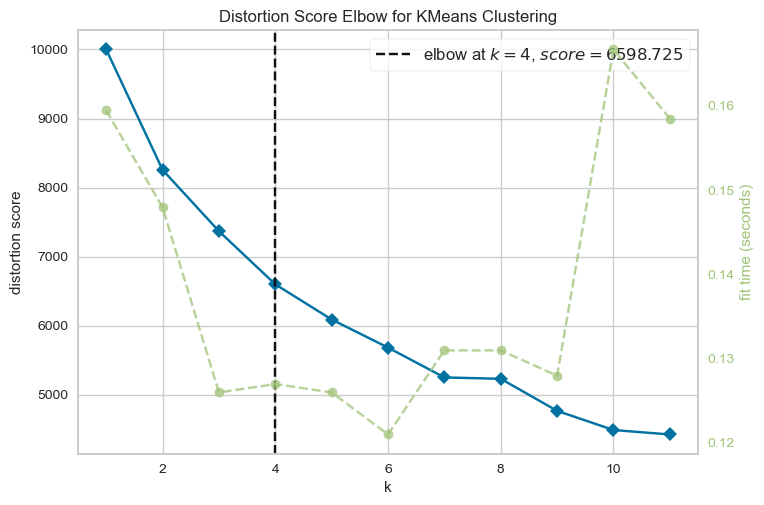

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [102]:
from yellowbrick.cluster import KElbowVisualizer

model = cluster.KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))# to get the best number of clusters
visualizer.fit(X)
visualizer.poof()

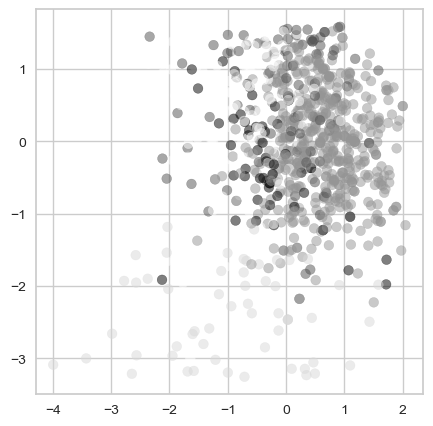

In [103]:
kmeans = cluster.KMeans(n_clusters=5,random_state=0)
kmeans.fit(X) # fit train the model
pred = kmeans.predict(X) #

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=pred,alpha=0.5)
plt.show()

In [104]:
from sklearn.metrics import silhouette_score

kmeans = cluster.KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)
y1_pred = kmeans.predict(X)


single = cluster.AgglomerativeClustering(n_clusters=5, linkage='single')
y2_pred = single.fit_predict(X)


print("Model 1 Silhouette Score: {}".format(silhouette_score(X, y1_pred)))
print("Model 2 Silhouette Score: {}".format(silhouette_score(X, y2_pred)))

Model 1 Silhouette Score: 0.17552140013224232
Model 2 Silhouette Score: 0.4056077808399189


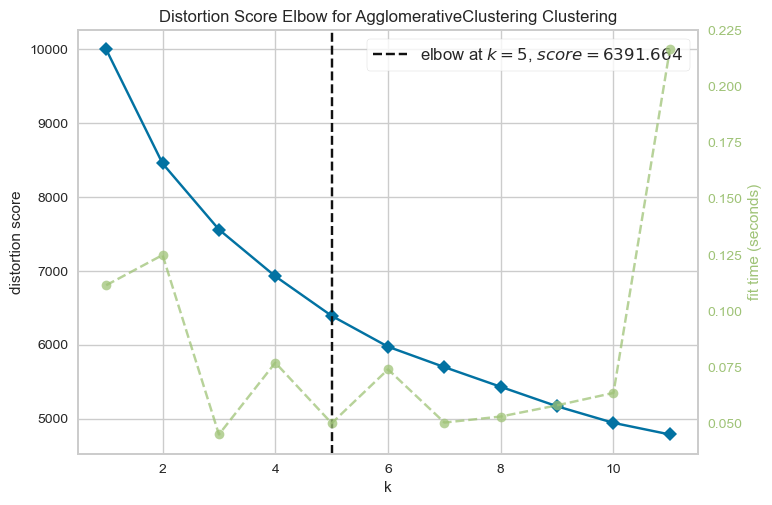

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [105]:
from yellowbrick.cluster import KElbowVisualizer

model = cluster.AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(1,12))# to get the best number of clusters
visualizer.fit(X)
visualizer.poof()

In [106]:
single = cluster.AgglomerativeClustering(n_clusters=5, linkage='single')
y2_pred = single.fit_predict(X)


print("Model 1 Silhouette Score: {}".format(silhouette_score(X, y2_pred)))

Model 1 Silhouette Score: 0.4056077808399189


In [107]:
#data_cluster

In [108]:
y2_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [109]:
data_cluster["cluster"]= y2_pred

In [110]:
#data_cluster.rename(columns={'Cluster': 'cluster'}, inplace=True)

In [111]:
data_cluster

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
0,0.854,0.674,-6.230,0.1840,0.05170,0.000085,0.5090,0.848,99.022,215467,0
1,0.548,0.805,-5.732,0.3510,0.21200,0.000405,0.4080,0.649,142.096,216387,0
2,0.461,0.897,-3.982,0.0920,0.00821,0.000000,0.0965,0.358,165.107,220537,0
3,0.784,0.627,-14.617,0.0572,0.04250,0.717000,0.0645,0.952,136.879,151440,0
4,0.769,0.818,-1.385,0.1920,0.26300,0.000000,0.0787,0.918,88.017,240800,0
...,...,...,...,...,...,...,...,...,...,...,...
995,0.549,0.416,-11.356,0.1120,0.66000,0.000000,0.1090,0.567,169.924,234157,0
996,0.613,0.698,-6.276,0.1160,0.04470,0.000522,0.0783,0.548,173.961,198693,0
997,0.749,0.428,-13.278,0.0387,0.46900,0.220000,0.1060,0.597,89.991,221333,0
998,0.788,0.859,-2.724,0.0856,0.28100,0.000000,0.0424,0.822,141.020,207853,0


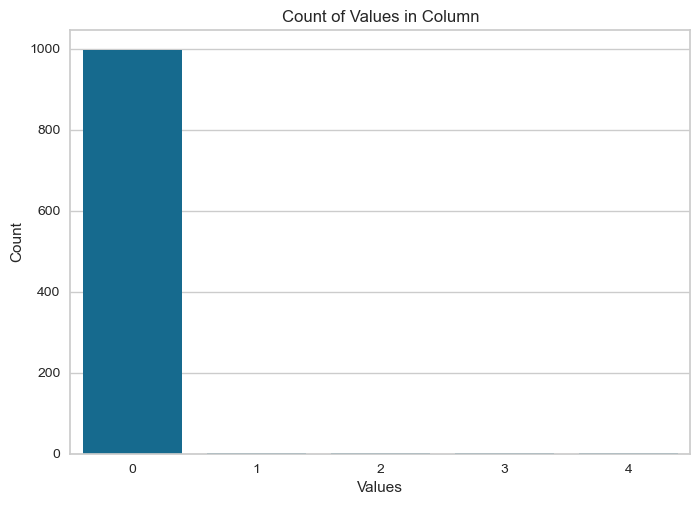

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called df and the column is 'column_name'
sns.countplot(x='cluster', data= data_cluster)

# Display the plot
plt.title('Count of Values in Column')
plt.xlabel('Values')
plt.ylabel('Count')
plt.show()

In [113]:
df_names = df_final[['id','names']]
df_names

,id,names
0,6WzRpISELf3YglGAh7TXcG,Popular (with Playboi Carti & Madonna) - From ...
1,79s5XnCN4TJKTVMSmOx8Ep,Dior
2,4GssB27iJeqmfGxS94Tfij,Popular Monster
3,45aoC0yE3RZGWz5QPb41M1,Popcorn
4,4E5IFAXCob6QqZaJMTw5YN,Poppin' Them Thangs
...,...,...
995,6nuRNZZxbt9u7eCVfh5tHH,Say You Won't Let Go
996,11cfL3XOGny9lrCm987F5c,Eyes Closed
997,3LVfYGjdOShjzdcjMPyOfC,Just the Two of Us
998,3IepH8F9FJYeZp983FQGMk,Shivers


In [114]:
df_merge = data_cluster.merge(df_names, left_index=True, right_index=True)

In [115]:
df_merge

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster,id,names
0,0.854,0.674,-6.230,0.1840,0.05170,0.000085,0.5090,0.848,99.022,215467,0,6WzRpISELf3YglGAh7TXcG,Popular (with Playboi Carti & Madonna) - From ...
1,0.548,0.805,-5.732,0.3510,0.21200,0.000405,0.4080,0.649,142.096,216387,0,79s5XnCN4TJKTVMSmOx8Ep,Dior
2,0.461,0.897,-3.982,0.0920,0.00821,0.000000,0.0965,0.358,165.107,220537,0,4GssB27iJeqmfGxS94Tfij,Popular Monster
3,0.784,0.627,-14.617,0.0572,0.04250,0.717000,0.0645,0.952,136.879,151440,0,45aoC0yE3RZGWz5QPb41M1,Popcorn
4,0.769,0.818,-1.385,0.1920,0.26300,0.000000,0.0787,0.918,88.017,240800,0,4E5IFAXCob6QqZaJMTw5YN,Poppin' Them Thangs
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.549,0.416,-11.356,0.1120,0.66000,0.000000,0.1090,0.567,169.924,234157,0,6nuRNZZxbt9u7eCVfh5tHH,Say You Won't Let Go
996,0.613,0.698,-6.276,0.1160,0.04470,0.000522,0.0783,0.548,173.961,198693,0,11cfL3XOGny9lrCm987F5c,Eyes Closed
997,0.749,0.428,-13.278,0.0387,0.46900,0.220000,0.1060,0.597,89.991,221333,0,3LVfYGjdOShjzdcjMPyOfC,Just the Two of Us
998,0.788,0.859,-2.724,0.0856,0.28100,0.000000,0.0424,0.822,141.020,207853,0,3IepH8F9FJYeZp983FQGMk,Shivers


In [116]:
#df_merge.to_csv('../01_data/df_merge_with_clusters.csv')

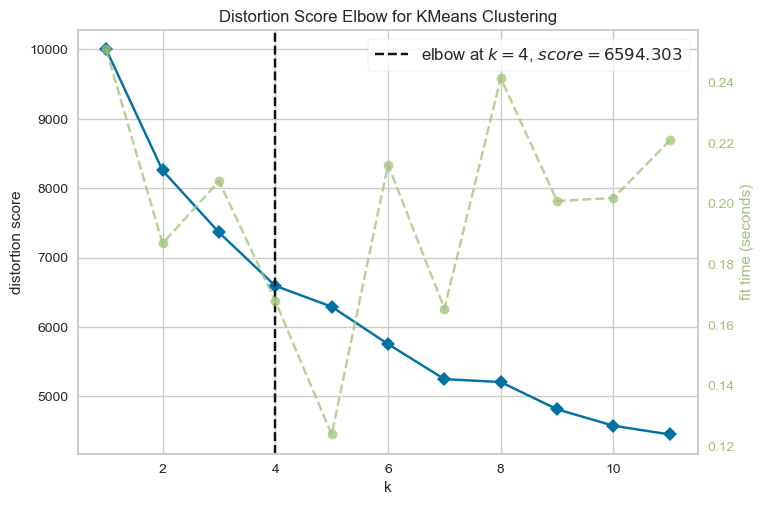

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [117]:
model = cluster.KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))# to get the best number of clusters
visualizer.fit(X)
visualizer.poof()

In [118]:
kmeans = cluster.KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
y1_pred1 = kmeans.predict(X)



print("Model 1 Silhouette Score: {}".format(silhouette_score(X, y1_pred1)))

Model 1 Silhouette Score: 0.14303577227218447


In [119]:
y1_pred1

array([2, 0, 0, 3, 2, 3, 2, 0, 0, 0, 2, 3, 0, 2, 2, 2, 3, 0, 0, 2, 3, 2,
       2, 2, 2, 0, 2, 3, 0, 2, 2, 2, 3, 2, 3, 3, 3, 2, 1, 0, 2, 2, 3, 2,
       2, 3, 0, 2, 3, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 3, 2, 3,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 3, 1, 2, 2, 3, 3, 0, 2, 0, 2, 2, 2, 2,
       0, 0, 2, 1, 2, 2, 0, 2, 2, 3, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0,
       2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 0, 2, 0, 2, 2, 0, 1,
       0, 2, 0, 2, 0, 2, 2, 3, 2, 2, 0, 0, 2, 2, 2, 3, 3, 0, 0, 2, 3, 2,
       2, 0, 0, 2, 2, 2, 2, 3, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 1,
       0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 3, 2, 2, 0, 2, 2, 2, 0, 2, 2,
       0, 0, 0, 0, 2, 0, 1, 2, 2, 0, 3, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2,
       2, 3, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 3, 2, 2, 3, 2, 2,
       2, 1, 3, 1, 0, 2, 2, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0, 3, 3, 0, 0, 3,
       0, 3, 2, 2, 2, 3, 2, 0, 0, 2, 0, 2, 0, 1, 2, 0, 2, 2, 0, 2, 2, 0,
       3, 3, 0, 1, 0, 0, 2, 3, 0, 1, 3, 2, 2, 3, 2,

In [120]:
data_cluster["cluster_knn"]= y1_pred1

In [121]:
data_cluster.rename(columns={'cluster': 'cluster_agg'}, inplace=True)

In [122]:
data_cluster

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster_agg,cluster_knn
0,0.854,0.674,-6.230,0.1840,0.05170,0.000085,0.5090,0.848,99.022,215467,0,2
1,0.548,0.805,-5.732,0.3510,0.21200,0.000405,0.4080,0.649,142.096,216387,0,0
2,0.461,0.897,-3.982,0.0920,0.00821,0.000000,0.0965,0.358,165.107,220537,0,0
3,0.784,0.627,-14.617,0.0572,0.04250,0.717000,0.0645,0.952,136.879,151440,0,3
4,0.769,0.818,-1.385,0.1920,0.26300,0.000000,0.0787,0.918,88.017,240800,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.549,0.416,-11.356,0.1120,0.66000,0.000000,0.1090,0.567,169.924,234157,0,2
996,0.613,0.698,-6.276,0.1160,0.04470,0.000522,0.0783,0.548,173.961,198693,0,0
997,0.749,0.428,-13.278,0.0387,0.46900,0.220000,0.1060,0.597,89.991,221333,0,2
998,0.788,0.859,-2.724,0.0856,0.28100,0.000000,0.0424,0.822,141.020,207853,0,2


In [123]:
data_cluster= data_cluster.merge(df_names, left_index=True, right_index=True)

In [124]:
data_cluster

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster_agg,cluster_knn,id,names
0,0.854,0.674,-6.230,0.1840,0.05170,0.000085,0.5090,0.848,99.022,215467,0,2,6WzRpISELf3YglGAh7TXcG,Popular (with Playboi Carti & Madonna) - From ...
1,0.548,0.805,-5.732,0.3510,0.21200,0.000405,0.4080,0.649,142.096,216387,0,0,79s5XnCN4TJKTVMSmOx8Ep,Dior
2,0.461,0.897,-3.982,0.0920,0.00821,0.000000,0.0965,0.358,165.107,220537,0,0,4GssB27iJeqmfGxS94Tfij,Popular Monster
3,0.784,0.627,-14.617,0.0572,0.04250,0.717000,0.0645,0.952,136.879,151440,0,3,45aoC0yE3RZGWz5QPb41M1,Popcorn
4,0.769,0.818,-1.385,0.1920,0.26300,0.000000,0.0787,0.918,88.017,240800,0,2,4E5IFAXCob6QqZaJMTw5YN,Poppin' Them Thangs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.549,0.416,-11.356,0.1120,0.66000,0.000000,0.1090,0.567,169.924,234157,0,2,6nuRNZZxbt9u7eCVfh5tHH,Say You Won't Let Go
996,0.613,0.698,-6.276,0.1160,0.04470,0.000522,0.0783,0.548,173.961,198693,0,0,11cfL3XOGny9lrCm987F5c,Eyes Closed
997,0.749,0.428,-13.278,0.0387,0.46900,0.220000,0.1060,0.597,89.991,221333,0,2,3LVfYGjdOShjzdcjMPyOfC,Just the Two of Us
998,0.788,0.859,-2.724,0.0856,0.28100,0.000000,0.0424,0.822,141.020,207853,0,2,3IepH8F9FJYeZp983FQGMk,Shivers


In [125]:
#data_cluster.to_csv('../01_data/spotify_pop_songs_1000_cluster.csv')

### Final Playlist

In [126]:
df_final_playlist= pd.read_csv("../01_data/final_playlist.csv")

In [127]:
columns_to_drop = ["id","names"]
X_playlist = df_final_playlist.drop(columns = columns_to_drop)


In [128]:
names_id = df_final_playlist[columns_to_drop]

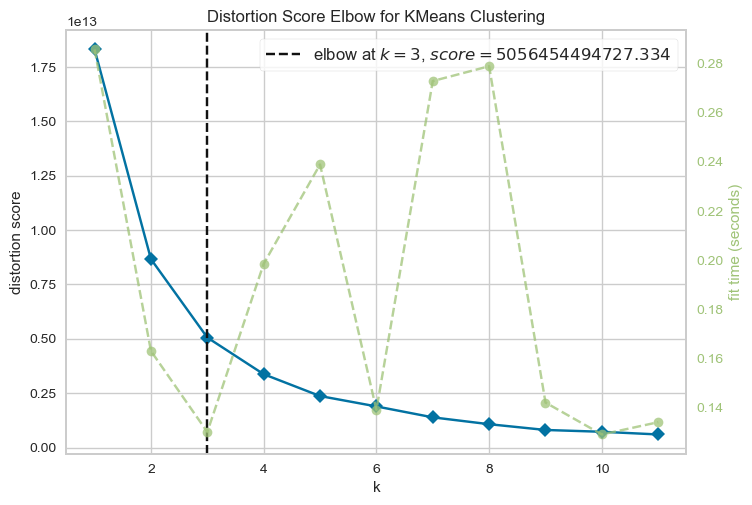

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [129]:
agg_model = cluster.AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(X_playlist)
visualizer.poof()

In [130]:
alg = cluster.AgglomerativeClustering(n_clusters=3, linkage="average")
pred_agg = alg.fit_predict(X_playlist)

In [131]:
silhouette_score(X_playlist, pred_agg, metric='euclidean')

0.7727377155202427

In [132]:
pred_agg

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [133]:
X_playlist["Cluster"] = pred_agg

In [134]:
df_playlist_merged = pd.concat([X_playlist, names_id], axis = 1)

In [135]:
df_playlist_merged

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Cluster,id,names
0,0.513,0.868,-5.061,0.0410,0.01850,0.000000,0.1210,0.3670,92.009,230467,2,1VU8t2MpJRLG5iFEIxqq7z,Geboren um zu leben
1,0.646,0.359,-10.388,0.1550,0.24700,0.914000,0.0872,0.1540,119.885,360147,2,4YRvb9B8cgvhst11qk8CKn,Sonnentanz
2,0.825,0.652,-3.183,0.0802,0.58100,0.000000,0.0931,0.9310,95.977,233713,2,7qiZfU4dY1lWllzX7mPBI3,Shape of You
3,0.694,0.770,-5.335,0.1490,0.17600,0.000011,0.1180,0.1630,125.905,184560,2,0E9ZjEAyAwOXZ7wJC0PD33,In My Mind
4,0.730,0.769,-5.114,0.0298,0.13800,0.000000,0.0473,0.5070,104.948,228093,2,4OSBTYWVwsQhGLF9NHvIbR,Rolling in the Deep
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4630,0.719,0.580,-6.173,0.0903,0.08180,0.812000,0.1170,0.4900,170.099,131294,2,1Wl0fMRT0YzndDmHZCFvoT,Roadtrip
4631,0.449,0.585,-6.761,0.0268,0.05090,0.000087,0.0833,0.2120,139.631,278719,2,6DGIg7YNSXWz1SAnJ1S8bX,Paradise
4632,0.690,0.723,-9.204,0.0639,0.17400,0.000000,0.2550,0.4870,149.987,157192,2,6WzGciwEdqlkPuMf3bDmX7,Roadtrip
4633,0.626,0.674,-10.002,0.0411,0.00237,0.863000,0.1060,0.0489,124.977,375361,2,2IJZWPp6TnMWHyGqjrz3Ci,Roadtrip - Moritz Hofbauer Remix


In [136]:
df_playlist_merged["Cluster"].value_counts ()

Cluster
2    4594
0      40
1       1
Name: count, dtype: int64

In [137]:
columns_to_drop = ["id","names"]
X_model_knn = df_final_playlist.drop(columns = columns_to_drop)
names_id = df_final_playlist[columns_to_drop]

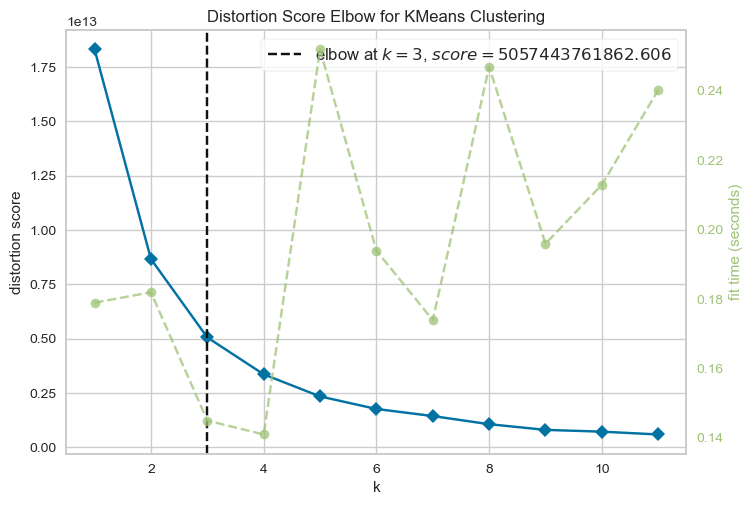

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [138]:
model = cluster.KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(X_model_knn)
visualizer.poof()

In [139]:
kmeans = cluster.KMeans(n_clusters=3, random_state=0)
kmeans_model= kmeans.fit(X_model_knn)
pred = kmeans.predict(X_model_knn)

In [140]:
#Load the train model
import pickle

with open('kmeans.pkl', 'wb') as file:
    pickle.dump(kmeans_model, file)


In [141]:
X_model_knn

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.513,0.868,-5.061,0.0410,0.01850,0.000000,0.1210,0.3670,92.009,230467
1,0.646,0.359,-10.388,0.1550,0.24700,0.914000,0.0872,0.1540,119.885,360147
2,0.825,0.652,-3.183,0.0802,0.58100,0.000000,0.0931,0.9310,95.977,233713
3,0.694,0.770,-5.335,0.1490,0.17600,0.000011,0.1180,0.1630,125.905,184560
4,0.730,0.769,-5.114,0.0298,0.13800,0.000000,0.0473,0.5070,104.948,228093
...,...,...,...,...,...,...,...,...,...,...
4630,0.719,0.580,-6.173,0.0903,0.08180,0.812000,0.1170,0.4900,170.099,131294
4631,0.449,0.585,-6.761,0.0268,0.05090,0.000087,0.0833,0.2120,139.631,278719
4632,0.690,0.723,-9.204,0.0639,0.17400,0.000000,0.2550,0.4870,149.987,157192
4633,0.626,0.674,-10.002,0.0411,0.00237,0.863000,0.1060,0.0489,124.977,375361


In [142]:
silhouette_score(X_model_knn, pred, metric='euclidean')

0.5400041546824723

In [143]:
pred

array([1, 2, 1, ..., 0, 2, 1])

In [ ]:
#X_model_knn["cluster_knn"] = pred

In [ ]:
#X_model["Cluster_kmeans"].value_counts()

In [ ]:
#df_kmean = pd.concat([X_playlist, names_id], axis = 1)

In [ ]:
#df_kmean["Cluster_kmeans"].value_counts()

In [ ]:
df_playlist_new = pd.concat([X_model_knn, names_id], axis = 1)

In [ ]:
df_playlist_new

In [ ]:
df_playlist_new.to_csv('../01_data/df_playlist_new.csv', index=True)


In [ ]:
#df_playlist_merged.rename(columns={'Cluster': 'cluster_agg'}, inplace=True)
#df_playlist_merged.rename(columns={'Cluster_kmeans': 'cluster_knn'}, inplace=True)

In [ ]:
#df_playlist_merged

In [ ]:
#df_playlist_merged.to_csv('../01_data/spotify_songs_5000_cluster.csv')

### Recommendation

In [192]:
#LOAD TRAINED MODEL
with open('kmeans.pkl', 'rb') as file:
    kmeans_model = pickle.load(file)

In [193]:
song_name = input("Write the song:")
song_name

Write the song: hello


'hello'

In [194]:
def bring_song(song_name):
    result = sp.search(q=song_name, limit=1, market="DE")
    song_id = result['tracks']['items'][0]['id']  # Get the song ID
    
    return song_id



In [195]:
selected_id= bring_song(song_name)

In [196]:
def classify_song (selected_id):
    features= sp.audio_features(selected_id)
    song_features = pd.DataFrame(features)
    song_features= song_features [["danceability", "energy", "loudness", "speechiness", "acousticness",
                 "instrumentalness", "liveness", "valence", "tempo", "id", "duration_ms"]]
    song_features= song_features.drop ("id", axis=1)
    
    pred_cluster = kmeans_model.predict(song_features)
    
    pred_cluster= pred_cluster[0]                          
   
    
    return pred_cluster

In [197]:
predicted_cluster= classify_song(selected_id)

In [198]:
df_playlist_new.shape

(4635, 13)

In [199]:
def song_recommender (pred_cluster):

    same_cluster_songs= df_playlist_new.loc[df_playlist_new["cluster_knn"]== pred_cluster]
    recommended_song= same_cluster_songs.sample(n=3)
   
    return recommended_song 

In [169]:
#def play_song (pred_cluster):

    #same_cluster_songs= df_playlist_new.loc[df_playlist_new["cluster_knn"]== pred_cluster]
    #recommended_id= same_cluster_songs.sample(n=3)
       
    #return recommended_id

In [200]:
song_recommender(predicted_cluster)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster_knn,id,names
642,0.833,0.582,-6.987,0.0659,0.05300,0.0577,0.1080,0.209,125.026,293579,2,1tNxprI7wf87blRuXUyEvC,Grey
3760,0.671,0.589,-10.711,0.0513,0.01820,0.0386,0.0491,0.873,139.619,494177,2,24vli6MCxjkWiPLQfETb3J,Dance With Me (Empire Remix) - 2021 Remaster
3042,0.774,0.750,-9.218,0.0647,0.00602,0.6390,0.1020,0.656,123.007,474616,2,4Om4hcaPAyltvB2vujUzjj,Nomada


In [211]:
song_ids(predicted_cluster)

KeyError: 'song_name'

In [182]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import spotipy
import streamlit as st
import pickle
import os


def bring_song(song_name):
    sp= spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="7a68b02225254d89bcfec29a84558222",
                                                          client_secret= "4567aa8c31ed4eaab7346bc014022c68"))

    result = sp.search(q=song_name, limit=1, market="DE")
    song_id = result['tracks']['items'][0]['id']  # Get the song ID
    
    return song_id



In [154]:
bring_song("hello")

'1Yk0cQdMLx5RzzFTYwmuld'

In [155]:
import pickle

try:
    with open('kmeans.pkl', 'rb') as f:
        kmeans_model = pickle.load(f)
    print("kmeans.pkl loaded successfully")

    with open('scaler.pkl', 'rb') as f:
        scaler_model = pickle.load(f)
    print("scaler.pkl loaded successfully")
except EOFError as e:
    print(f"Error loading pickle file: {e}")



kmeans.pkl loaded successfully
scaler.pkl loaded successfully


In [156]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pickle
import pandas as pd


data = X_model_knn

# Fit a scaler to the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Fit the KMeans model
kmeans = cluster.KMeans(n_clusters=3, random_state=0)
kmeans_model= kmeans.fit(X_model_knn)
pred = kmeans.predict(X_model_knn)
#kmeans_model = KMeans(n_clusters=5)
#kmeans_model.fit(scaled_data)

# Save the KMeans model to a file
with open('kmeans.pkl', 'wb') as file:
    pickle.dump(kmeans_model, file)

# Save the scaler to a file
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("Models saved successfully!")


Models saved successfully!


In [157]:
X_model_knn

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.513,0.868,-5.061,0.0410,0.01850,0.000000,0.1210,0.3670,92.009,230467
1,0.646,0.359,-10.388,0.1550,0.24700,0.914000,0.0872,0.1540,119.885,360147
2,0.825,0.652,-3.183,0.0802,0.58100,0.000000,0.0931,0.9310,95.977,233713
3,0.694,0.770,-5.335,0.1490,0.17600,0.000011,0.1180,0.1630,125.905,184560
4,0.730,0.769,-5.114,0.0298,0.13800,0.000000,0.0473,0.5070,104.948,228093
...,...,...,...,...,...,...,...,...,...,...
4630,0.719,0.580,-6.173,0.0903,0.08180,0.812000,0.1170,0.4900,170.099,131294
4631,0.449,0.585,-6.761,0.0268,0.05090,0.000087,0.0833,0.2120,139.631,278719
4632,0.690,0.723,-9.204,0.0639,0.17400,0.000000,0.2550,0.4870,149.987,157192
4633,0.626,0.674,-10.002,0.0411,0.00237,0.863000,0.1060,0.0489,124.977,375361


In [158]:
import pickle

# Test loading the kmeans.pkl
try:
    with open('kmeans.pkl', 'rb') as file:
        kmeans_model = pickle.load(file)
        print("kmeans.pkl loaded successfully!")
except EOFError as e:
    print(f"Error: {e}")

kmeans.pkl loaded successfully!


In [183]:
# Function to embed Spotify player using the track URI
def embed_spotify_player(track_uri):
    spotify_embed_code = f"""
    <iframe src="https://open.spotify.com/embed/track/{track_uri}" width="300" height="80" frameborder="0" allowtransparency="true" allow="encrypted-media"></iframe>
    """
    st.markdown(spotify_embed_code, unsafe_allow_html=True)

In [209]:
def song_ids(pred_cluster):
    # Filter songs that are in the same cluster
    same_cluster_songs = df_playlist_new.loc[df_playlist_new["cluster_knn"] == pred_cluster]

    # Randomly sample 3 songs from that filtered set
    recommended_songs = same_cluster_songs.sample(n=3)

    # Extract the song names and IDs (not URIs)
    song_names = recommended_songs['song_name'].tolist()  # Assuming your DataFrame has a 'song_name' column
    song_ids = recommended_songs['spotify_id'].tolist()  # Assuming your DataFrame has a 'spotify_id' column

    return {
        'names': song_names,
        'ids': song_ids  # Return the IDs for playback
    }

In [210]:
song_ids(pred_cluster)

NameError: name 'pred_cluster' is not defined

In [215]:
def song_recommender(pred_cluster):
    # Filter songs that are in the same cluster
    same_cluster_songs = df_playlist_new.loc[df_playlist_new["cluster_knn"] == pred_cluster]

    # Randomly sample 3 songs from that filtered set
    recommended_songs = same_cluster_songs.sample(n=3)

    # Extract the song names and Spotify IDs
    song_names = recommended_songs['names'].tolist()  # Assuming the DataFrame has 'song_name' column
    song_ids = recommended_songs['id'].tolist()  # Assuming the DataFrame has 'spotify_id' column
    
    return {
        'names': song_names,
        'ids': song_ids  # Return the IDs so they can be played
    }

In [213]:
# Function to embed Spotify player using the track ID
def play_song(track_id):
    # Generate the Spotify embed code using the track ID
    spotify_embed_code = f"""
    <iframe src="https://open.spotify.com/embed/track/{track_id}" width="300" height="80" frameborder="0" allowtransparency="true" allow="encrypted-media"></iframe>
    """
    # Use st.markdown to display the player in Streamlit
    st.markdown(spotify_embed_code, unsafe_allow_html=True)

In [223]:
# Step 2: Song Recommender Function
from IPython.core.display import display, HTML
def song_recommender(pred_cluster):
    same_cluster_songs = df_playlist_new.loc[df_playlist_new["cluster_knn"] == pred_cluster]
    recommended_songs = same_cluster_songs.sample(n=2)
    
    return {
        'names': recommended_songs['names'].tolist(),
        'ids': recommended_songs['id'].tolist()
    }

# Step 3: Play Song Function
def play_song(track_id):
    spotify_embed_code = f"""
    <iframe src="https://open.spotify.com/embed/track/{track_id}" width="300" height="80" frameborder="0" allowtransparency="true" allow="encrypted-media"></iframe>
    """
    return spotify_embed_code

# Step 4: Simulate a recommendation and play the first recommended song
pred_cluster = 1  # Simulate for cluster 1
recommended_songs = song_recommender(pred_cluster)

# Print recommended songs
print("Recommended Songs:", recommended_songs)

# Play the first recommended song
track_id = recommended_songs['ids'][0]
embed_code = play_song(track_id)

# Display the embed code (as HTML in Jupyter)
display(HTML(embed_code))

Recommended Songs: {'names': ['La La La (Brasil 2014) (feat. Carlinhos Brown)', 'SHAKE IT'], 'ids': ['6i2kn3iS5WKzsaYBdeHLIQ', '1QSVrSVmTGrcPaShtkojwd']}


C:\Users\Nicole\AppData\Local\Temp\ipykernel_4452\2189763092.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML
